In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import xgboost as xgb
from fancyimpute import KNN
df = pd.read_csv(r"/content/Heart_Disease.csv")

In [ ]:
pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [ ]:
df.describe()


,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,264.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,135.500000,54.424242,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,78.086491,9.183488,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,1.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,68.250000,47.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,135.500000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,202.750000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,270.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.isnull().sum()


id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64

In [ ]:
df.duplicated().sum()


0

In [ ]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', nan, 'children',
       'Never_worked'], dtype=object)

In [ ]:
#encoding
for col_name in df.columns:
    series = df[col_name]
    label_encoder = LabelEncoder()
    df[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )


In [ ]:
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,0,36.0,0.0,3,21,128,0,2,10,0,23,1,3,0,2.0,1.0,1
1,1,33.0,1.0,2,10,143,0,2,58,0,16,1,0,2,3.0,2.0,0
2,2,23.0,0.0,1,16,84,0,0,39,0,3,0,0,2,2.0,2.0,1
3,3,30.0,0.0,3,19,86,0,0,7,1,2,1,1,2,2.0,3.0,0
4,4,38.0,1.0,1,13,92,0,2,20,1,2,0,1,0,3.0,2.0,0


In [ ]:
df["work_type"].unique()

array([ 2.,  3.,  0., nan,  4.,  1.])

In [ ]:
df.isnull().sum()

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
encode_data = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
gender_col = df[['Gender']]  # extract the Gender column
work_type_col = df[["work_type"]]
gender_imputed = imputer.fit_transform(gender_col)  # fill in missing values with KNN imputation
gender_encoded = [1 if val > 0.5 else 0 for val in gender_imputed]  # encode imputed values as 0 or 1
encode_data['Gender'] = gender_encoded
encode_data['work_type'] = round(encode_data['work_type'])
encode_data['smoking_status'] = round(encode_data['smoking_status'])
encode_data['Heart Disease'] = round(encode_data['Heart Disease'] )


In [ ]:
encode_data.isnull().sum()

id                         0
Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  0
smoking_status             0
Heart Disease              0
dtype: int64

In [ ]:
encode_data.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,0.0,36.0,0,3.0,21.0,128.0,0.0,2.0,10.0,0.0,23.0,1.0,3.0,0.0,2.0,1.0,1.0
1,1.0,33.0,1,2.0,10.0,143.0,0.0,2.0,58.0,0.0,16.0,1.0,0.0,2.0,3.0,2.0,0.0
2,2.0,23.0,0,1.0,16.0,84.0,0.0,0.0,39.0,0.0,3.0,0.0,0.0,2.0,2.0,2.0,1.0
3,3.0,30.0,0,3.0,19.0,86.0,0.0,0.0,7.0,1.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0
4,4.0,38.0,1,1.0,13.0,92.0,0.0,2.0,20.0,1.0,2.0,0.0,1.0,0.0,3.0,2.0,0.0


In [ ]:
#detect outliers
columns = ['id','Age','Gender','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium','Heart Disease','work_type','smoking_status']
for col in columns:
    q25, q75 = np.percentile(encode_data[col], 25), np.percentile(encode_data[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = ( ( encode_data[col] < lower) | (encode_data[col] > upper) )
    index_label = encode_data[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    # df.drop(index_label, inplace=True)


Number of outliers in id: 0
Number of outliers in Age: 0
Number of outliers in Gender: 0
Number of outliers in Chest pain type: 20
Number of outliers in BP: 0
Number of outliers in Cholesterol: 0
Number of outliers in FBS over 120: 40
Number of outliers in EKG results: 0
Number of outliers in Max HR: 0
Number of outliers in Exercise angina: 0
Number of outliers in ST depression: 0
Number of outliers in Slope of ST: 0
Number of outliers in Number of vessels fluro: 19
Number of outliers in Thallium: 0
Number of outliers in Heart Disease: 0
Number of outliers in work_type: 32
Number of outliers in smoking_status: 0


In [ ]:
def outlier_remove(s):
  q1= encode_data[s].quantile(0.25)
  q3= encode_data[s].quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - (1.5*IQR)
  upper_bound = q3 + (1.5*IQR)
  for i in encode_data[s] :
    if i < lower_bound :
      encode_data[s] = encode_data[s].replace(i, lower_bound)
    if i > upper_bound :
     encode_data[s] = encode_data[s].replace(i, upper_bound)


In [ ]:
columns = ['id','Age','Gender','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium','Heart Disease','work_type','smoking_status']
for i in columns:
    outlier_remove(i)


In [ ]:
columns = ['id','Age','Gender','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium','Heart Disease','work_type','smoking_status']
for col in columns:
    q25, q75 = np.percentile(encode_data[col], 25), np.percentile(encode_data[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = ( ( encode_data[col] < lower) | (encode_data[col] > upper) )
    index_label = encode_data[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    # df.drop(index_label, inplace=True)


Number of outliers in id: 0
Number of outliers in Age: 0
Number of outliers in Gender: 0
Number of outliers in Chest pain type: 0
Number of outliers in BP: 0
Number of outliers in Cholesterol: 0
Number of outliers in FBS over 120: 0
Number of outliers in EKG results: 0
Number of outliers in Max HR: 0
Number of outliers in Exercise angina: 0
Number of outliers in ST depression: 0
Number of outliers in Slope of ST: 0
Number of outliers in Number of vessels fluro: 0
Number of outliers in Thallium: 0
Number of outliers in Heart Disease: 0
Number of outliers in work_type: 0
Number of outliers in smoking_status: 0


In [ ]:
unique_values = encode_data['Gender'].nunique()
print("Number of unique values in Column_Name:", unique_values)
unique_values = encode_data['work_type'].nunique()
print("Number of unique values in Column_Name:", unique_values)
unique_values = encode_data['smoking_status'].nunique()
print("Number of unique values in Column_Name:", unique_values)
unique_values = encode_data['Heart Disease'].nunique()
print("Number of unique values in Column_Name:", unique_values)


Number of unique values in Column_Name: 2
Number of unique values in Column_Name: 5
Number of unique values in Column_Name: 4
Number of unique values in Column_Name: 2


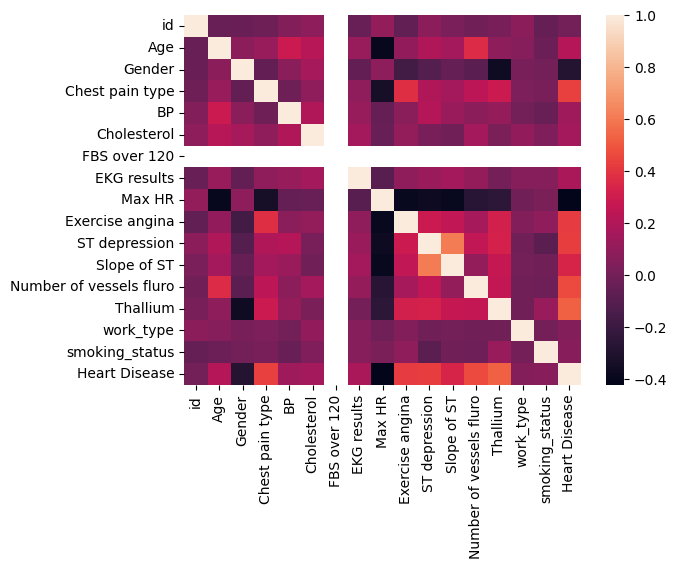

In [ ]:
correlation_matrix = encode_data.corr()
sns.heatmap(correlation_matrix)
plt.show()


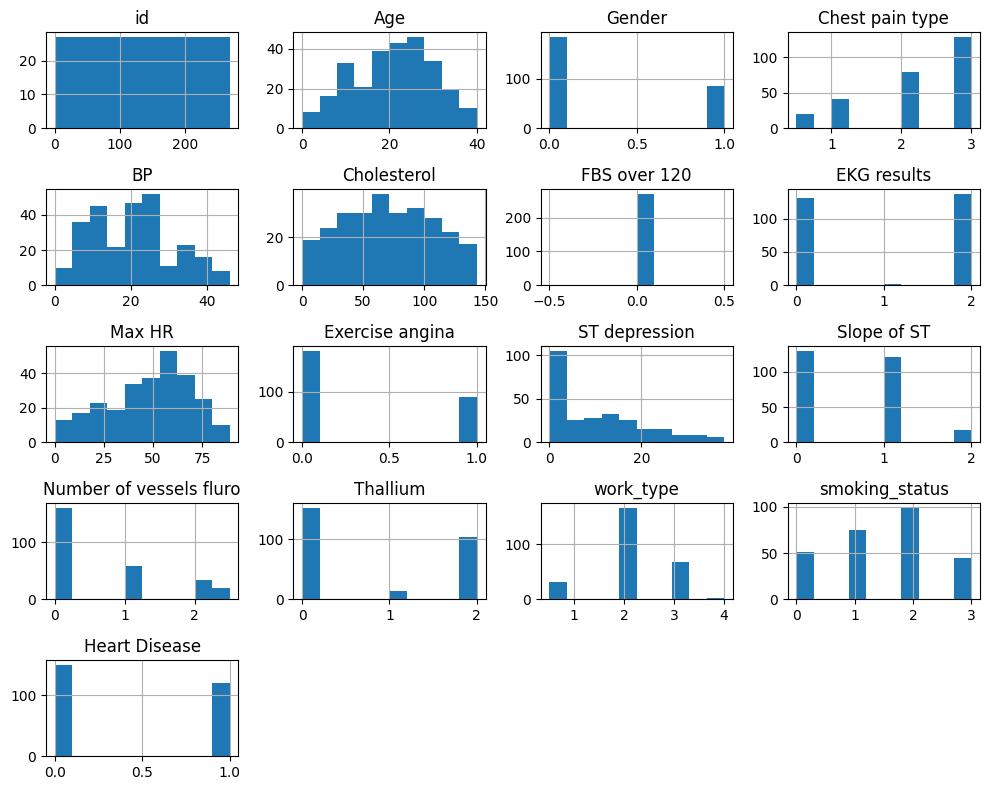

In [ ]:
fig = encode_data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()


In [ ]:
encode_data.drop(['id','work_type','smoking_status','FBS over 120'],axis=1,inplace=True)


<Axes: xlabel='index', ylabel='Heart Disease'>

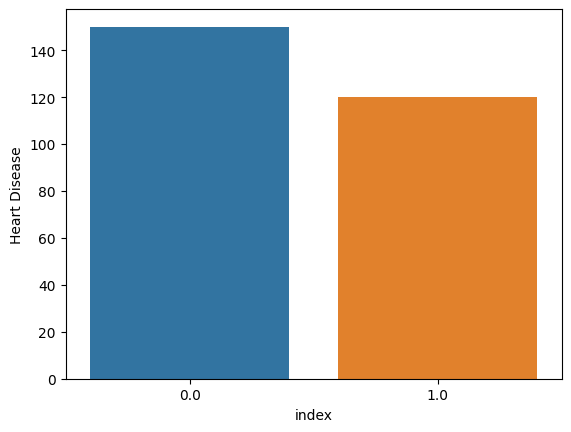

In [ ]:
# Create a DataFrame of value counts for the 'Heart Disease' column
heart_disease_counts = encode_data['Heart Disease'].value_counts().reset_index()

# Create a bar plot of the value counts
sns.barplot(x='index', y='Heart Disease', data=heart_disease_counts)


In [ ]:
#split data
X = encode_data.iloc[:, :-1].values
y = encode_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 0.8


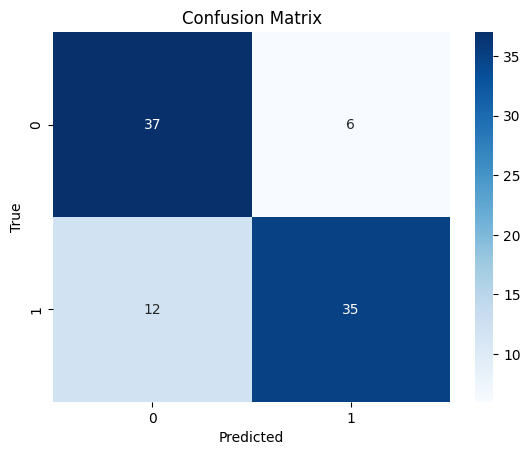

Mean squared error: 0.2
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.80        43
         1.0       0.85      0.74      0.80        47

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.81      0.80      0.80        90



In [ ]:
rfc = xgb.XGBClassifier()

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
report = classification_report(y_test, y_pred)
print(report)



Accuracy: 0.8555555555555555


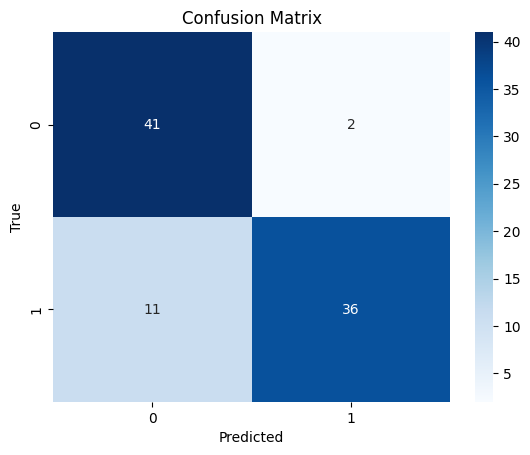

Mean squared error: 0.14444444444444443
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86        43
         1.0       0.95      0.77      0.85        47

    accuracy                           0.86        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.87      0.86      0.85        90



In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.8444444444444444



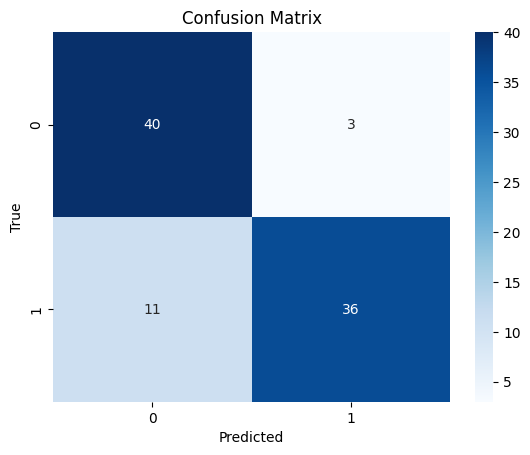

Mean squared error: 0.15555555555555556
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        43
         1.0       0.92      0.77      0.84        47

    accuracy                           0.84        90
   macro avg       0.85      0.85      0.84        90
weighted avg       0.86      0.84      0.84        90



In [ ]:
model = LogisticRegression(random_state=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)
print()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.8333333333333334



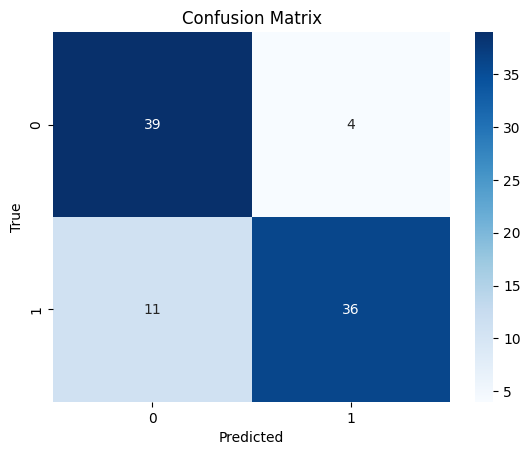

Mean squared error: 0.16666666666666666
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        43
         1.0       0.90      0.77      0.83        47

    accuracy                           0.83        90
   macro avg       0.84      0.84      0.83        90
weighted avg       0.84      0.83      0.83        90



In [ ]:
clf = SVC(kernel='linear')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)
print()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.7555555555555555



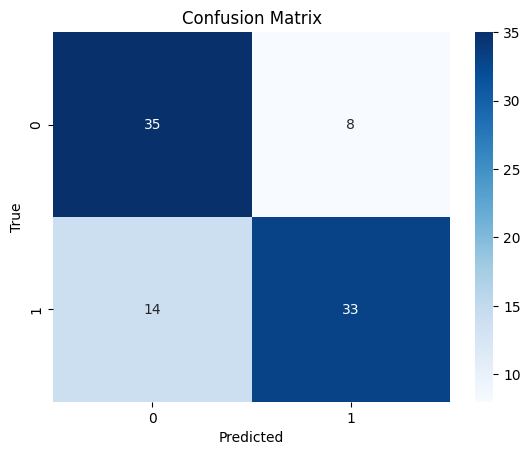

Mean squared error: 0.24444444444444444
              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76        43
         1.0       0.80      0.70      0.75        47

    accuracy                           0.76        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.76      0.76      0.76        90



In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)
print()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
report = classification_report(y_test, y_pred)
print(report)


Maximum accuracy:- 0.8444444444444444 at K = 22


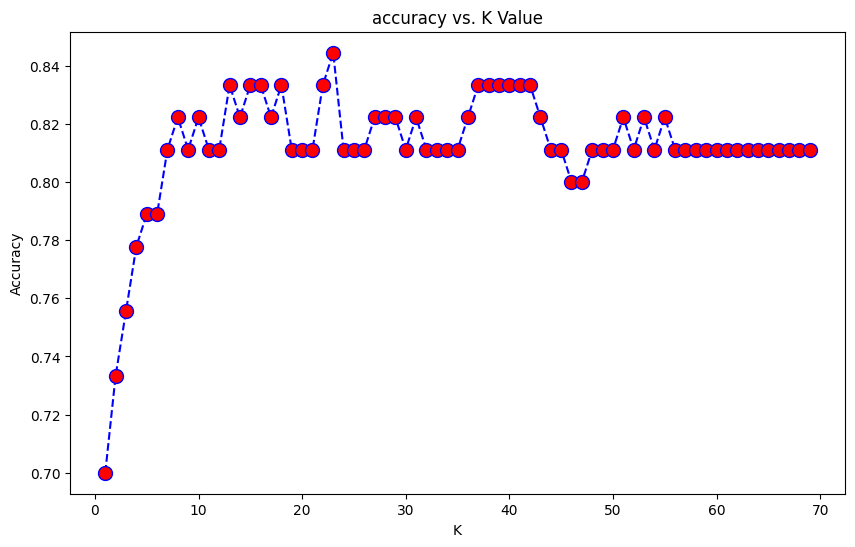

In [ ]:

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,70):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,70),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Accuracy: 0.8333333333333334



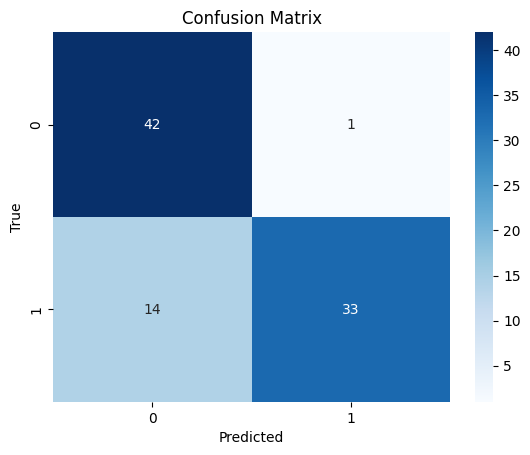

Mean squared error: 0.16666666666666666
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85        43
         1.0       0.97      0.70      0.81        47

    accuracy                           0.83        90
   macro avg       0.86      0.84      0.83        90
weighted avg       0.87      0.83      0.83        90



In [ ]:
knnclass = KNeighborsClassifier(n_neighbors = 22)
knnclass.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knnclass.predict(X_test)
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)
print()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 10}
